In [1]:
%matplotlib inline

In [2]:
%run notebook_setup

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


theano version: 1.0.4


pymc3 version: 3.7


exoplanet version: 0.2.4.dev6+g2171caa


In [3]:
ndim = 15

In [4]:
import time

import emcee
import numpy as np

import pymc3 as pm
from pymc3.step_methods.hmc import quadpotential as quad

In [5]:
np.random.seed(41)

with pm.Model() as model:
    pm.Normal("x", shape=ndim)

    potential = quad.QuadPotentialDiag(np.ones(ndim))

    step_kwargs = dict()
    step_kwargs["model"] = model
    step_kwargs["step_scale"] = 1.0 * model.ndim ** 0.25
    step_kwargs["adapt_step_size"] = False
    step = pm.NUTS(potential=potential, **step_kwargs)

    start = time.time()
    trace = pm.sample(tune=0, draws=10000, step=step, cores=1)
    time_pymc3 = time.time() - start

Sequential sampling (2 chains in 1 job)


NUTS: [x]


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [00:00<1:04:05,  2.60it/s]

  2%|▏         | 154/10000 [00:00<44:12,  3.71it/s]

  3%|▎         | 307/10000 [00:00<30:30,  5.30it/s]

  4%|▍         | 440/10000 [00:00<21:05,  7.55it/s]

  6%|▌         | 590/10000 [00:00<14:33, 10.77it/s]

  7%|▋         | 738/10000 [00:00<10:03, 15.33it/s]

  9%|▉         | 885/10000 [00:00<06:57, 21.81it/s]

 10%|█         | 1024/10000 [00:01<04:50, 30.95it/s]

 12%|█▏        | 1175/10000 [00:01<03:21, 43.82it/s]

 13%|█▎        | 1319/10000 [00:01<02:20, 61.80it/s]

 15%|█▍        | 1463/10000 [00:01<01:38, 86.68it/s]

 16%|█▌        | 1604/10000 [00:01<01:09, 120.53it/s]

 18%|█▊        | 1760/10000 [00:01<00:49, 166.64it/s]

 19%|█▉        | 1914/10000 [00:01<00:35, 227.49it/s]

 21%|██        | 2064/10000 [00:01<00:26, 305.10it/s]

 22%|██▏       | 2222/10000 [00:01<00:19, 402.47it/s]

 24%|██▍       | 2378/10000 [00:01<00:14, 517.60it/s]

 25%|██▌       | 2531/10000 [00:02<00:11, 642.07it/s]

 27%|██▋       | 2682/10000 [00:02<00:09, 773.28it/s]

 28%|██▊       | 2832/10000 [00:02<00:07, 899.42it/s]

 30%|██▉       | 2981/10000 [00:02<00:06, 1018.73it/s]

 31%|███▏      | 3130/10000 [00:02<00:06, 1112.13it/s]

 33%|███▎      | 3279/10000 [00:02<00:05, 1201.66it/s]

 34%|███▍      | 3426/10000 [00:02<00:05, 1266.01it/s]

 36%|███▌      | 3575/10000 [00:02<00:04, 1323.50it/s]

 37%|███▋      | 3724/10000 [00:02<00:04, 1367.89it/s]

 39%|███▊      | 3872/10000 [00:03<00:04, 1376.88it/s]

 40%|████      | 4017/10000 [00:03<00:04, 1383.82it/s]

 42%|████▏     | 4164/10000 [00:03<00:04, 1407.43it/s]

 43%|████▎     | 4309/10000 [00:03<00:04, 1390.76it/s]

 45%|████▍     | 4462/10000 [00:03<00:03, 1427.57it/s]

 46%|████▌     | 4616/10000 [00:03<00:03, 1457.30it/s]

 48%|████▊     | 4774/10000 [00:03<00:03, 1491.58it/s]

 49%|████▉     | 4925/10000 [00:03<00:03, 1481.74it/s]

 51%|█████     | 5077/10000 [00:03<00:03, 1491.88it/s]

 52%|█████▏    | 5232/10000 [00:03<00:03, 1506.40it/s]

 54%|█████▍    | 5385/10000 [00:04<00:03, 1512.91it/s]

 55%|█████▌    | 5537/10000 [00:04<00:02, 1507.47it/s]

 57%|█████▋    | 5689/10000 [00:04<00:02, 1459.37it/s]

 58%|█████▊    | 5836/10000 [00:04<00:02, 1461.03it/s]

 60%|█████▉    | 5989/10000 [00:04<00:02, 1480.22it/s]

 61%|██████▏   | 6141/10000 [00:04<00:02, 1491.49it/s]

 63%|██████▎   | 6293/10000 [00:04<00:02, 1498.36it/s]

 64%|██████▍   | 6448/10000 [00:04<00:02, 1511.87it/s]

 66%|██████▌   | 6600/10000 [00:04<00:02, 1513.37it/s]

 68%|██████▊   | 6752/10000 [00:04<00:02, 1508.03it/s]

 69%|██████▉   | 6903/10000 [00:05<00:02, 1506.03it/s]

 71%|███████   | 7054/10000 [00:05<00:02, 1438.05it/s]

 72%|███████▏  | 7204/10000 [00:05<00:01, 1454.15it/s]

 74%|███████▎  | 7354/10000 [00:05<00:01, 1464.83it/s]

 75%|███████▌  | 7510/10000 [00:05<00:01, 1489.54it/s]

 77%|███████▋  | 7665/10000 [00:05<00:01, 1505.06it/s]

 78%|███████▊  | 7823/10000 [00:05<00:01, 1525.11it/s]

 80%|███████▉  | 7976/10000 [00:05<00:01, 1479.74it/s]

 81%|████████▏ | 8127/10000 [00:05<00:01, 1486.38it/s]

 83%|████████▎ | 8276/10000 [00:05<00:01, 1483.48it/s]

 84%|████████▍ | 8426/10000 [00:06<00:01, 1485.66it/s]

 86%|████████▌ | 8576/10000 [00:06<00:00, 1488.77it/s]

 87%|████████▋ | 8725/10000 [00:06<00:00, 1468.16it/s]

 89%|████████▊ | 8874/10000 [00:06<00:00, 1473.50it/s]

 90%|█████████ | 9022/10000 [00:06<00:00, 1470.64it/s]

 92%|█████████▏| 9175/10000 [00:06<00:00, 1487.51it/s]

 93%|█████████▎| 9330/10000 [00:06<00:00, 1503.98it/s]

 95%|█████████▍| 9481/10000 [00:06<00:00, 1487.65it/s]

 96%|█████████▋| 9630/10000 [00:06<00:00, 1471.25it/s]

 98%|█████████▊| 9778/10000 [00:07<00:00, 1458.77it/s]

 99%|█████████▉| 9924/10000 [00:07<00:00, 1458.06it/s]

100%|██████████| 10000/10000 [00:07<00:00, 1397.51it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]

  1%|▏         | 137/10000 [00:00<00:07, 1364.82it/s]

  3%|▎         | 278/10000 [00:00<00:07, 1375.98it/s]

  4%|▍         | 426/10000 [00:00<00:06, 1404.56it/s]

  6%|▌         | 581/10000 [00:00<00:06, 1443.19it/s]

  7%|▋         | 693/10000 [00:00<00:07, 1241.84it/s]

  8%|▊         | 848/10000 [00:00<00:06, 1320.47it/s]

 10%|▉         | 991/10000 [00:00<00:06, 1351.24it/s]

 11%|█▏        | 1126/10000 [00:00<00:06, 1349.46it/s]

 13%|█▎        | 1281/10000 [00:00<00:06, 1401.22it/s]

 14%|█▍        | 1436/10000 [00:01<00:05, 1441.45it/s]

 16%|█▌        | 1592/10000 [00:01<00:05, 1473.84it/s]

 17%|█▋        | 1739/10000 [00:01<00:05, 1468.79it/s]

 19%|█▉        | 1895/10000 [00:01<00:05, 1493.33it/s]

 20%|██        | 2045/10000 [00:01<00:05, 1493.13it/s]

 22%|██▏       | 2202/10000 [00:01<00:05, 1513.23it/s]

 24%|██▎       | 2360/10000 [00:01<00:04, 1532.36it/s]

 25%|██▌       | 2514/10000 [00:01<00:04, 1524.38it/s]

 27%|██▋       | 2667/10000 [00:01<00:04, 1514.07it/s]

 28%|██▊       | 2819/10000 [00:01<00:04, 1505.99it/s]

 30%|██▉       | 2970/10000 [00:02<00:04, 1460.35it/s]

 31%|███       | 3124/10000 [00:02<00:04, 1482.72it/s]

 33%|███▎      | 3273/10000 [00:02<00:04, 1457.75it/s]

 34%|███▍      | 3425/10000 [00:02<00:04, 1474.22it/s]

 36%|███▌      | 3573/10000 [00:02<00:04, 1461.95it/s]

 37%|███▋      | 3725/10000 [00:02<00:04, 1477.48it/s]

 39%|███▉      | 3876/10000 [00:02<00:04, 1487.02it/s]

 40%|████      | 4025/10000 [00:02<00:04, 1484.67it/s]

 42%|████▏     | 4174/10000 [00:02<00:03, 1470.69it/s]

 43%|████▎     | 4325/10000 [00:02<00:03, 1480.87it/s]

 45%|████▍     | 4477/10000 [00:03<00:03, 1490.03it/s]

 46%|████▋     | 4627/10000 [00:03<00:03, 1492.81it/s]

 48%|████▊     | 4777/10000 [00:03<00:03, 1459.55it/s]

 49%|████▉     | 4924/10000 [00:03<00:03, 1429.03it/s]

 51%|█████     | 5074/10000 [00:03<00:03, 1448.79it/s]

 52%|█████▏    | 5230/10000 [00:03<00:03, 1479.17it/s]

 54%|█████▍    | 5386/10000 [00:03<00:03, 1501.72it/s]

 55%|█████▌    | 5537/10000 [00:03<00:02, 1498.50it/s]

 57%|█████▋    | 5694/10000 [00:03<00:02, 1517.36it/s]

 58%|█████▊    | 5846/10000 [00:03<00:02, 1499.20it/s]

 60%|██████    | 6000/10000 [00:04<00:02, 1509.68it/s]

 62%|██████▏   | 6157/10000 [00:04<00:02, 1524.54it/s]

 63%|██████▎   | 6310/10000 [00:04<00:02, 1492.28it/s]

 65%|██████▍   | 6462/10000 [00:04<00:02, 1499.54it/s]

 66%|██████▌   | 6613/10000 [00:04<00:02, 1479.78it/s]

 68%|██████▊   | 6764/10000 [00:04<00:02, 1485.99it/s]

 69%|██████▉   | 6913/10000 [00:04<00:02, 1484.49it/s]

 71%|███████   | 7062/10000 [00:04<00:01, 1477.71it/s]

 72%|███████▏  | 7211/10000 [00:04<00:01, 1479.46it/s]

 74%|███████▎  | 7360/10000 [00:04<00:01, 1482.52it/s]

 75%|███████▌  | 7509/10000 [00:05<00:01, 1483.63it/s]

 77%|███████▋  | 7659/10000 [00:05<00:01, 1486.72it/s]

 78%|███████▊  | 7808/10000 [00:05<00:01, 1486.09it/s]

 80%|███████▉  | 7961/10000 [00:05<00:01, 1496.51it/s]

 81%|████████  | 8117/10000 [00:05<00:01, 1512.89it/s]

 83%|████████▎ | 8269/10000 [00:05<00:01, 1497.05it/s]

 84%|████████▍ | 8419/10000 [00:05<00:01, 1495.41it/s]

 86%|████████▌ | 8569/10000 [00:05<00:01, 1412.98it/s]

 87%|████████▋ | 8720/10000 [00:05<00:00, 1439.78it/s]

 89%|████████▊ | 8873/10000 [00:06<00:00, 1464.64it/s]

 90%|█████████ | 9024/10000 [00:06<00:00, 1477.67it/s]

 92%|█████████▏| 9175/10000 [00:06<00:00, 1486.29it/s]

 93%|█████████▎| 9325/10000 [00:06<00:00, 1489.92it/s]

 95%|█████████▍| 9476/10000 [00:06<00:00, 1494.33it/s]

 96%|█████████▋| 9626/10000 [00:06<00:00, 1472.57it/s]

 98%|█████████▊| 9778/10000 [00:06<00:00, 1484.36it/s]

 99%|█████████▉| 9929/10000 [00:06<00:00, 1491.10it/s]

100%|██████████| 10000/10000 [00:06<00:00, 1473.70it/s]

The acceptance probability does not match the target. It is 0.7000475965558693, but should be close to 0.8. Try to increase the number of tuning steps.


The acceptance probability does not match the target. It is 0.6982303140324398, but should be close to 0.8. Try to increase the number of tuning steps.


In [6]:
samples_pymc3 = np.array(trace.get_values("x", combine=False))
samples_pymc3 = np.moveaxis(samples_pymc3, 0, 1)
tau_pymc3 = emcee.autocorr.integrated_time(samples_pymc3)
neff_pymc3 = np.prod(samples_pymc3.shape[:2]) / tau_pymc3
teff_pymc3 = time_pymc3 / neff_pymc3
teff_pymc3

array([0.00044301, 0.00042698, 0.00045684, 0.00046773, 0.00045698,
       0.00044066, 0.00046705, 0.00046028, 0.00044724, 0.00042437,
       0.00045569, 0.00047578, 0.00042072, 0.0004195 , 0.00043917])

In [7]:
np.random.seed(1234)

import exoplanet as xo

with model:
    func = xo.get_theano_function_for_var(model.logpt)

    def logprob(theta):
        point = model.bijection.rmap(theta)
        args = xo.get_args_for_theano_function(point)
        return func(*args)

    x0 = np.random.randn(ndim)
    nwalkers = 36
    x0 = np.random.randn(nwalkers, ndim)

    emcee_sampler = emcee.EnsembleSampler(nwalkers, ndim, logprob)
    state = emcee_sampler.run_mcmc(x0, 2000, progress=True)
    emcee_sampler.reset()
    strt = time.time()
    emcee_sampler.run_mcmc(state, 20000, progress=True)
    time_emcee = time.time() - strt

  0%|          | 0/2000 [00:00<?, ?it/s]

  2%|▏         | 48/2000 [00:00<00:04, 478.99it/s]

  5%|▍         | 93/2000 [00:00<00:04, 467.83it/s]

  7%|▋         | 140/2000 [00:00<00:03, 467.20it/s]

  9%|▉         | 187/2000 [00:00<00:03, 467.40it/s]

 12%|█▏        | 234/2000 [00:00<00:03, 465.26it/s]

 14%|█▍        | 278/2000 [00:00<00:03, 457.32it/s]

 16%|█▌        | 323/2000 [00:00<00:03, 453.99it/s]

 18%|█▊        | 369/2000 [00:00<00:03, 455.73it/s]

 21%|██        | 416/2000 [00:00<00:03, 458.20it/s]

 23%|██▎       | 463/2000 [00:01<00:03, 458.66it/s]

 25%|██▌       | 508/2000 [00:01<00:03, 451.61it/s]

 28%|██▊       | 553/2000 [00:01<00:03, 441.19it/s]

 30%|███       | 600/2000 [00:01<00:03, 447.27it/s]

 32%|███▏      | 646/2000 [00:01<00:03, 450.65it/s]

 35%|███▍      | 693/2000 [00:01<00:02, 453.98it/s]

 37%|███▋      | 740/2000 [00:01<00:02, 455.80it/s]

 39%|███▉      | 786/2000 [00:01<00:02, 454.98it/s]

 42%|████▏     | 832/2000 [00:01<00:02, 455.01it/s]

 44%|████▍     | 878/2000 [00:01<00:02, 452.32it/s]

 46%|████▌     | 924/2000 [00:02<00:02, 450.17it/s]

 48%|████▊     | 969/2000 [00:02<00:02, 449.43it/s]

 51%|█████     | 1015/2000 [00:02<00:02, 450.84it/s]

 53%|█████▎    | 1061/2000 [00:02<00:02, 449.29it/s]

 55%|█████▌    | 1107/2000 [00:02<00:01, 451.32it/s]

 58%|█████▊    | 1155/2000 [00:02<00:01, 456.91it/s]

 60%|██████    | 1202/2000 [00:02<00:01, 459.14it/s]

 62%|██████▏   | 1248/2000 [00:02<00:01, 450.04it/s]

 65%|██████▍   | 1294/2000 [00:02<00:01, 449.52it/s]

 67%|██████▋   | 1340/2000 [00:02<00:01, 452.26it/s]

 69%|██████▉   | 1386/2000 [00:03<00:01, 453.71it/s]

 72%|███████▏  | 1433/2000 [00:03<00:01, 456.19it/s]

 74%|███████▍  | 1479/2000 [00:03<00:01, 454.20it/s]

 76%|███████▋  | 1525/2000 [00:03<00:01, 454.16it/s]

 79%|███████▊  | 1571/2000 [00:03<00:00, 451.00it/s]

 81%|████████  | 1619/2000 [00:03<00:00, 456.81it/s]

 83%|████████▎ | 1665/2000 [00:03<00:00, 438.88it/s]

 86%|████████▌ | 1710/2000 [00:03<00:00, 436.83it/s]

 88%|████████▊ | 1754/2000 [00:03<00:00, 436.26it/s]

 90%|█████████ | 1801/2000 [00:03<00:00, 443.68it/s]

 92%|█████████▏| 1849/2000 [00:04<00:00, 451.56it/s]

 95%|█████████▍| 1896/2000 [00:04<00:00, 456.72it/s]

 97%|█████████▋| 1943/2000 [00:04<00:00, 459.42it/s]

100%|█████████▉| 1991/2000 [00:04<00:00, 464.03it/s]

100%|██████████| 2000/2000 [00:04<00:00, 453.21it/s]


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 48/20000 [00:00<00:41, 475.79it/s]

  0%|          | 95/20000 [00:00<00:42, 471.43it/s]

  1%|          | 141/20000 [00:00<00:42, 467.64it/s]

  1%|          | 190/20000 [00:00<00:42, 470.93it/s]

  1%|          | 235/20000 [00:00<00:42, 464.11it/s]

  1%|▏         | 281/20000 [00:00<00:42, 461.59it/s]

  2%|▏         | 329/20000 [00:00<00:42, 466.09it/s]

  2%|▏         | 375/20000 [00:00<00:42, 462.78it/s]

  2%|▏         | 424/20000 [00:00<00:41, 468.06it/s]

  2%|▏         | 472/20000 [00:01<00:41, 468.80it/s]

  3%|▎         | 519/20000 [00:01<00:41, 467.11it/s]

  3%|▎         | 565/20000 [00:01<00:42, 461.86it/s]

  3%|▎         | 611/20000 [00:01<00:42, 454.73it/s]

  3%|▎         | 657/20000 [00:01<00:42, 453.86it/s]

  4%|▎         | 703/20000 [00:01<00:42, 453.54it/s]

  4%|▎         | 749/20000 [00:01<00:42, 455.27it/s]

  4%|▍         | 795/20000 [00:01<00:42, 456.42it/s]

  4%|▍         | 841/20000 [00:01<00:42, 449.25it/s]

  4%|▍         | 887/20000 [00:01<00:42, 452.38it/s]

  5%|▍         | 933/20000 [00:02<00:42, 453.66it/s]

  5%|▍         | 979/20000 [00:02<00:42, 451.01it/s]

  5%|▌         | 1025/20000 [00:02<00:41, 453.27it/s]

  5%|▌         | 1071/20000 [00:02<00:43, 439.09it/s]

  6%|▌         | 1118/20000 [00:02<00:42, 445.28it/s]

  6%|▌         | 1167/20000 [00:02<00:41, 454.97it/s]

  6%|▌         | 1215/20000 [00:02<00:40, 459.40it/s]

  6%|▋         | 1263/20000 [00:02<00:40, 461.89it/s]

  7%|▋         | 1310/20000 [00:02<00:40, 462.21it/s]

  7%|▋         | 1357/20000 [00:02<00:40, 464.08it/s]

  7%|▋         | 1404/20000 [00:03<00:39, 465.48it/s]

  7%|▋         | 1451/20000 [00:03<00:39, 465.95it/s]

  7%|▋         | 1498/20000 [00:03<00:40, 458.19it/s]

  8%|▊         | 1544/20000 [00:03<00:40, 452.97it/s]

  8%|▊         | 1590/20000 [00:03<00:40, 452.12it/s]

  8%|▊         | 1638/20000 [00:03<00:39, 460.14it/s]

  8%|▊         | 1685/20000 [00:03<00:39, 460.86it/s]

  9%|▊         | 1733/20000 [00:03<00:39, 464.46it/s]

  9%|▉         | 1780/20000 [00:03<00:39, 460.27it/s]

  9%|▉         | 1829/20000 [00:03<00:38, 466.03it/s]

  9%|▉         | 1876/20000 [00:04<00:38, 465.05it/s]

 10%|▉         | 1923/20000 [00:04<00:39, 462.57it/s]

 10%|▉         | 1970/20000 [00:04<00:39, 455.40it/s]

 10%|█         | 2016/20000 [00:04<00:39, 452.96it/s]

 10%|█         | 2062/20000 [00:04<00:40, 439.09it/s]

 11%|█         | 2107/20000 [00:04<00:40, 438.49it/s]

 11%|█         | 2153/20000 [00:04<00:40, 443.94it/s]

 11%|█         | 2199/20000 [00:04<00:39, 446.24it/s]

 11%|█         | 2245/20000 [00:04<00:39, 447.97it/s]

 11%|█▏        | 2292/20000 [00:05<00:39, 453.39it/s]

 12%|█▏        | 2339/20000 [00:05<00:38, 456.13it/s]

 12%|█▏        | 2387/20000 [00:05<00:38, 460.32it/s]

 12%|█▏        | 2434/20000 [00:05<00:38, 453.03it/s]

 12%|█▏        | 2480/20000 [00:05<00:39, 443.95it/s]

 13%|█▎        | 2527/20000 [00:05<00:38, 449.08it/s]

 13%|█▎        | 2572/20000 [00:05<00:39, 446.49it/s]

 13%|█▎        | 2618/20000 [00:05<00:38, 449.15it/s]

 13%|█▎        | 2666/20000 [00:05<00:37, 456.63it/s]

 14%|█▎        | 2713/20000 [00:05<00:37, 459.82it/s]

 14%|█▍        | 2761/20000 [00:06<00:37, 462.85it/s]

 14%|█▍        | 2808/20000 [00:06<00:37, 460.34it/s]

 14%|█▍        | 2856/20000 [00:06<00:36, 463.37it/s]

 15%|█▍        | 2903/20000 [00:06<00:36, 463.65it/s]

 15%|█▍        | 2950/20000 [00:06<00:37, 450.57it/s]

 15%|█▍        | 2998/20000 [00:06<00:37, 456.44it/s]

 15%|█▌        | 3047/20000 [00:06<00:36, 463.40it/s]

 15%|█▌        | 3095/20000 [00:06<00:36, 466.85it/s]

 16%|█▌        | 3142/20000 [00:06<00:36, 466.46it/s]

 16%|█▌        | 3189/20000 [00:06<00:36, 463.23it/s]

 16%|█▌        | 3236/20000 [00:07<00:36, 460.16it/s]

 16%|█▋        | 3283/20000 [00:07<00:36, 455.01it/s]

 17%|█▋        | 3329/20000 [00:07<00:37, 449.70it/s]

 17%|█▋        | 3375/20000 [00:07<00:37, 447.10it/s]

 17%|█▋        | 3421/20000 [00:07<00:36, 449.33it/s]

 17%|█▋        | 3468/20000 [00:07<00:36, 455.10it/s]

 18%|█▊        | 3515/20000 [00:07<00:35, 458.88it/s]

 18%|█▊        | 3562/20000 [00:07<00:35, 460.06it/s]

 18%|█▊        | 3609/20000 [00:07<00:35, 458.52it/s]

 18%|█▊        | 3656/20000 [00:07<00:35, 458.39it/s]

 19%|█▊        | 3702/20000 [00:08<00:36, 449.35it/s]

 19%|█▊        | 3749/20000 [00:08<00:35, 454.96it/s]

 19%|█▉        | 3795/20000 [00:08<00:36, 441.11it/s]

 19%|█▉        | 3840/20000 [00:08<00:37, 430.95it/s]

 19%|█▉        | 3887/20000 [00:08<00:36, 441.43it/s]

 20%|█▉        | 3935/20000 [00:08<00:35, 452.04it/s]

 20%|█▉        | 3982/20000 [00:08<00:35, 457.20it/s]

 20%|██        | 4028/20000 [00:08<00:34, 458.03it/s]

 20%|██        | 4075/20000 [00:08<00:34, 458.57it/s]

 21%|██        | 4123/20000 [00:09<00:34, 461.90it/s]

 21%|██        | 4171/20000 [00:09<00:34, 463.84it/s]

 21%|██        | 4218/20000 [00:09<00:34, 457.30it/s]

 21%|██▏       | 4264/20000 [00:09<00:34, 451.45it/s]

 22%|██▏       | 4310/20000 [00:09<00:35, 448.00it/s]

 22%|██▏       | 4355/20000 [00:09<00:35, 441.89it/s]

 22%|██▏       | 4401/20000 [00:09<00:34, 446.69it/s]

 22%|██▏       | 4446/20000 [00:09<00:34, 446.74it/s]

 22%|██▏       | 4491/20000 [00:09<00:34, 443.94it/s]

 23%|██▎       | 4537/20000 [00:09<00:34, 448.36it/s]

 23%|██▎       | 4582/20000 [00:10<00:35, 437.60it/s]

 23%|██▎       | 4626/20000 [00:10<00:35, 433.14it/s]

 23%|██▎       | 4673/20000 [00:10<00:34, 441.29it/s]

 24%|██▎       | 4719/20000 [00:10<00:34, 445.30it/s]

 24%|██▍       | 4766/20000 [00:10<00:33, 449.73it/s]

 24%|██▍       | 4814/20000 [00:10<00:33, 456.40it/s]

 24%|██▍       | 4862/20000 [00:10<00:32, 461.93it/s]

 25%|██▍       | 4909/20000 [00:10<00:32, 462.83it/s]

 25%|██▍       | 4956/20000 [00:10<00:32, 464.69it/s]

 25%|██▌       | 5003/20000 [00:10<00:32, 462.97it/s]

 25%|██▌       | 5050/20000 [00:11<00:32, 457.81it/s]

 25%|██▌       | 5097/20000 [00:11<00:32, 460.95it/s]

 26%|██▌       | 5145/20000 [00:11<00:32, 463.79it/s]

 26%|██▌       | 5192/20000 [00:11<00:32, 462.27it/s]

 26%|██▌       | 5239/20000 [00:11<00:32, 457.29it/s]

 26%|██▋       | 5285/20000 [00:11<00:32, 456.06it/s]

 27%|██▋       | 5331/20000 [00:11<00:32, 456.08it/s]

 27%|██▋       | 5378/20000 [00:11<00:31, 459.73it/s]

 27%|██▋       | 5424/20000 [00:11<00:32, 455.17it/s]

 27%|██▋       | 5470/20000 [00:12<00:32, 452.16it/s]

 28%|██▊       | 5516/20000 [00:12<00:32, 451.46it/s]

 28%|██▊       | 5562/20000 [00:12<00:32, 444.11it/s]

 28%|██▊       | 5607/20000 [00:12<00:32, 442.34it/s]

 28%|██▊       | 5656/20000 [00:12<00:31, 453.57it/s]

 29%|██▊       | 5703/20000 [00:12<00:31, 456.24it/s]

 29%|██▊       | 5749/20000 [00:12<00:31, 454.57it/s]

 29%|██▉       | 5796/20000 [00:12<00:30, 458.75it/s]

 29%|██▉       | 5844/20000 [00:12<00:30, 464.06it/s]

 29%|██▉       | 5891/20000 [00:12<00:30, 465.20it/s]

 30%|██▉       | 5938/20000 [00:13<00:30, 463.28it/s]

 30%|██▉       | 5985/20000 [00:13<00:30, 464.76it/s]

 30%|███       | 6032/20000 [00:13<00:30, 462.49it/s]

 30%|███       | 6079/20000 [00:13<00:30, 461.97it/s]

 31%|███       | 6126/20000 [00:13<00:29, 464.03it/s]

 31%|███       | 6173/20000 [00:13<00:29, 462.10it/s]

 31%|███       | 6221/20000 [00:13<00:29, 465.92it/s]

 31%|███▏      | 6268/20000 [00:13<00:29, 461.42it/s]

 32%|███▏      | 6316/20000 [00:13<00:29, 466.15it/s]

 32%|███▏      | 6364/20000 [00:13<00:29, 469.08it/s]

 32%|███▏      | 6411/20000 [00:14<00:29, 466.80it/s]

 32%|███▏      | 6459/20000 [00:14<00:28, 467.89it/s]

 33%|███▎      | 6506/20000 [00:14<00:29, 463.90it/s]

 33%|███▎      | 6553/20000 [00:14<00:29, 458.07it/s]

 33%|███▎      | 6599/20000 [00:14<00:29, 457.78it/s]

 33%|███▎      | 6645/20000 [00:14<00:29, 454.53it/s]

 33%|███▎      | 6691/20000 [00:14<00:29, 450.13it/s]

 34%|███▎      | 6737/20000 [00:14<00:29, 447.04it/s]

 34%|███▍      | 6784/20000 [00:14<00:29, 451.07it/s]

 34%|███▍      | 6830/20000 [00:14<00:29, 449.67it/s]

 34%|███▍      | 6876/20000 [00:15<00:29, 451.40it/s]

 35%|███▍      | 6924/20000 [00:15<00:28, 458.56it/s]

 35%|███▍      | 6971/20000 [00:15<00:28, 459.65it/s]

 35%|███▌      | 7017/20000 [00:15<00:28, 456.52it/s]

 35%|███▌      | 7063/20000 [00:15<00:28, 457.08it/s]

 36%|███▌      | 7109/20000 [00:15<00:28, 447.98it/s]

 36%|███▌      | 7155/20000 [00:15<00:28, 450.37it/s]

 36%|███▌      | 7201/20000 [00:15<00:28, 449.97it/s]

 36%|███▌      | 7247/20000 [00:15<00:28, 452.37it/s]

 36%|███▋      | 7294/20000 [00:15<00:27, 456.27it/s]

 37%|███▋      | 7340/20000 [00:16<00:28, 449.70it/s]

 37%|███▋      | 7387/20000 [00:16<00:27, 453.87it/s]

 37%|███▋      | 7433/20000 [00:16<00:27, 452.50it/s]

 37%|███▋      | 7479/20000 [00:16<00:27, 450.58it/s]

 38%|███▊      | 7527/20000 [00:16<00:27, 457.66it/s]

 38%|███▊      | 7573/20000 [00:16<00:27, 451.06it/s]

 38%|███▊      | 7619/20000 [00:16<00:27, 452.26it/s]

 38%|███▊      | 7666/20000 [00:16<00:26, 457.01it/s]

 39%|███▊      | 7713/20000 [00:16<00:26, 459.92it/s]

 39%|███▉      | 7760/20000 [00:17<00:26, 460.82it/s]

 39%|███▉      | 7807/20000 [00:17<00:26, 461.56it/s]

 39%|███▉      | 7854/20000 [00:17<00:26, 462.49it/s]

 40%|███▉      | 7901/20000 [00:17<00:26, 457.84it/s]

 40%|███▉      | 7947/20000 [00:17<00:26, 446.51it/s]

 40%|███▉      | 7992/20000 [00:17<00:27, 433.09it/s]

 40%|████      | 8036/20000 [00:17<00:27, 434.31it/s]

 40%|████      | 8080/20000 [00:17<00:28, 418.81it/s]

 41%|████      | 8127/20000 [00:17<00:27, 431.38it/s]

 41%|████      | 8175/20000 [00:17<00:26, 444.40it/s]

 41%|████      | 8224/20000 [00:18<00:25, 454.52it/s]

 41%|████▏     | 8270/20000 [00:18<00:25, 456.02it/s]

 42%|████▏     | 8318/20000 [00:18<00:25, 460.70it/s]

 42%|████▏     | 8365/20000 [00:18<00:25, 459.45it/s]

 42%|████▏     | 8412/20000 [00:18<00:25, 459.75it/s]

 42%|████▏     | 8460/20000 [00:18<00:24, 464.98it/s]

 43%|████▎     | 8507/20000 [00:18<00:25, 458.60it/s]

 43%|████▎     | 8554/20000 [00:18<00:24, 461.83it/s]

 43%|████▎     | 8601/20000 [00:18<00:25, 452.28it/s]

 43%|████▎     | 8647/20000 [00:18<00:25, 452.02it/s]

 43%|████▎     | 8694/20000 [00:19<00:24, 453.73it/s]

 44%|████▎     | 8741/20000 [00:19<00:24, 457.53it/s]

 44%|████▍     | 8788/20000 [00:19<00:24, 460.63it/s]

 44%|████▍     | 8835/20000 [00:19<00:24, 463.01it/s]

 44%|████▍     | 8882/20000 [00:19<00:23, 465.06it/s]

 45%|████▍     | 8929/20000 [00:19<00:23, 464.62it/s]

 45%|████▍     | 8976/20000 [00:19<00:24, 455.63it/s]

 45%|████▌     | 9023/20000 [00:19<00:24, 456.84it/s]

 45%|████▌     | 9069/20000 [00:19<00:24, 450.45it/s]

 46%|████▌     | 9116/20000 [00:20<00:23, 454.19it/s]

 46%|████▌     | 9162/20000 [00:20<00:23, 453.93it/s]

 46%|████▌     | 9208/20000 [00:20<00:23, 455.68it/s]

 46%|████▋     | 9256/20000 [00:20<00:23, 459.00it/s]

 47%|████▋     | 9302/20000 [00:20<00:23, 455.34it/s]

 47%|████▋     | 9348/20000 [00:20<00:23, 454.45it/s]

 47%|████▋     | 9394/20000 [00:20<00:23, 447.60it/s]

 47%|████▋     | 9439/20000 [00:20<00:23, 444.22it/s]

 47%|████▋     | 9484/20000 [00:20<00:24, 437.63it/s]

 48%|████▊     | 9530/20000 [00:20<00:23, 442.79it/s]

 48%|████▊     | 9576/20000 [00:21<00:23, 446.43it/s]

 48%|████▊     | 9621/20000 [00:21<00:23, 446.56it/s]

 48%|████▊     | 9667/20000 [00:21<00:22, 449.35it/s]

 49%|████▊     | 9712/20000 [00:21<00:23, 440.93it/s]

 49%|████▉     | 9758/20000 [00:21<00:23, 444.99it/s]

 49%|████▉     | 9803/20000 [00:21<00:22, 443.35it/s]

 49%|████▉     | 9848/20000 [00:21<00:22, 442.65it/s]

 49%|████▉     | 9893/20000 [00:21<00:22, 444.55it/s]

 50%|████▉     | 9939/20000 [00:21<00:22, 447.26it/s]

 50%|████▉     | 9985/20000 [00:21<00:22, 448.54it/s]

 50%|█████     | 10030/20000 [00:22<00:22, 448.90it/s]

 50%|█████     | 10076/20000 [00:22<00:22, 450.64it/s]

 51%|█████     | 10122/20000 [00:22<00:21, 452.00it/s]

 51%|█████     | 10168/20000 [00:22<00:22, 436.85it/s]

 51%|█████     | 10212/20000 [00:22<00:22, 433.78it/s]

 51%|█████▏    | 10259/20000 [00:22<00:22, 441.66it/s]

 52%|█████▏    | 10305/20000 [00:22<00:21, 443.89it/s]

 52%|█████▏    | 10351/20000 [00:22<00:21, 447.00it/s]

 52%|█████▏    | 10398/20000 [00:22<00:21, 451.31it/s]

 52%|█████▏    | 10444/20000 [00:22<00:21, 452.25it/s]

 52%|█████▏    | 10492/20000 [00:23<00:20, 457.74it/s]

 53%|█████▎    | 10539/20000 [00:23<00:20, 460.58it/s]

 53%|█████▎    | 10587/20000 [00:23<00:20, 464.58it/s]

 53%|█████▎    | 10635/20000 [00:23<00:20, 465.86it/s]

 53%|█████▎    | 10683/20000 [00:23<00:19, 467.69it/s]

 54%|█████▎    | 10731/20000 [00:23<00:19, 467.47it/s]

 54%|█████▍    | 10778/20000 [00:23<00:20, 458.29it/s]

 54%|█████▍    | 10826/20000 [00:23<00:19, 463.47it/s]

 54%|█████▍    | 10873/20000 [00:23<00:19, 461.59it/s]

 55%|█████▍    | 10920/20000 [00:24<00:19, 463.01it/s]

 55%|█████▍    | 10967/20000 [00:24<00:19, 459.30it/s]

 55%|█████▌    | 11013/20000 [00:24<00:19, 456.39it/s]

 55%|█████▌    | 11061/20000 [00:24<00:19, 461.87it/s]

 56%|█████▌    | 11108/20000 [00:24<00:19, 451.13it/s]

 56%|█████▌    | 11156/20000 [00:24<00:19, 457.72it/s]

 56%|█████▌    | 11205/20000 [00:24<00:18, 464.37it/s]

 56%|█████▋    | 11253/20000 [00:24<00:18, 465.40it/s]

 56%|█████▋    | 11300/20000 [00:24<00:18, 464.37it/s]

 57%|█████▋    | 11347/20000 [00:24<00:18, 462.94it/s]

 57%|█████▋    | 11394/20000 [00:25<00:18, 462.72it/s]

 57%|█████▋    | 11441/20000 [00:25<00:18, 463.99it/s]

 57%|█████▋    | 11488/20000 [00:25<00:18, 459.82it/s]

 58%|█████▊    | 11535/20000 [00:25<00:18, 461.00it/s]

 58%|█████▊    | 11582/20000 [00:25<00:18, 461.06it/s]

 58%|█████▊    | 11629/20000 [00:25<00:18, 456.83it/s]

 58%|█████▊    | 11675/20000 [00:25<00:18, 455.68it/s]

 59%|█████▊    | 11721/20000 [00:25<00:18, 456.38it/s]

 59%|█████▉    | 11768/20000 [00:25<00:17, 458.27it/s]

 59%|█████▉    | 11814/20000 [00:25<00:18, 454.24it/s]

 59%|█████▉    | 11860/20000 [00:26<00:17, 455.17it/s]

 60%|█████▉    | 11906/20000 [00:26<00:17, 450.40it/s]

 60%|█████▉    | 11952/20000 [00:26<00:17, 447.19it/s]

 60%|█████▉    | 11998/20000 [00:26<00:17, 448.67it/s]

 60%|██████    | 12043/20000 [00:26<00:17, 444.32it/s]

 60%|██████    | 12091/20000 [00:26<00:17, 452.41it/s]

 61%|██████    | 12137/20000 [00:26<00:18, 435.42it/s]

 61%|██████    | 12181/20000 [00:26<00:17, 435.98it/s]

 61%|██████    | 12226/20000 [00:26<00:17, 437.87it/s]

 61%|██████▏   | 12272/20000 [00:26<00:17, 442.59it/s]

 62%|██████▏   | 12319/20000 [00:27<00:17, 448.89it/s]

 62%|██████▏   | 12364/20000 [00:27<00:17, 445.98it/s]

 62%|██████▏   | 12409/20000 [00:27<00:17, 443.89it/s]

 62%|██████▏   | 12454/20000 [00:27<00:17, 442.04it/s]

 62%|██████▎   | 12500/20000 [00:27<00:16, 443.94it/s]

 63%|██████▎   | 12548/20000 [00:27<00:16, 452.28it/s]

 63%|██████▎   | 12594/20000 [00:27<00:16, 452.31it/s]

 63%|██████▎   | 12641/20000 [00:27<00:16, 455.35it/s]

 63%|██████▎   | 12688/20000 [00:27<00:16, 455.65it/s]

 64%|██████▎   | 12736/20000 [00:28<00:15, 459.73it/s]

 64%|██████▍   | 12783/20000 [00:28<00:15, 462.26it/s]

 64%|██████▍   | 12831/20000 [00:28<00:15, 464.49it/s]

 64%|██████▍   | 12878/20000 [00:28<00:15, 460.32it/s]

 65%|██████▍   | 12925/20000 [00:28<00:15, 457.76it/s]

 65%|██████▍   | 12972/20000 [00:28<00:15, 461.16it/s]

 65%|██████▌   | 13019/20000 [00:28<00:15, 443.08it/s]

 65%|██████▌   | 13064/20000 [00:28<00:15, 440.03it/s]

 66%|██████▌   | 13110/20000 [00:28<00:15, 444.25it/s]

 66%|██████▌   | 13158/20000 [00:28<00:15, 450.87it/s]

 66%|██████▌   | 13204/20000 [00:29<00:15, 450.79it/s]

 66%|██████▋   | 13251/20000 [00:29<00:14, 454.40it/s]

 66%|██████▋   | 13298/20000 [00:29<00:14, 457.38it/s]

 67%|██████▋   | 13345/20000 [00:29<00:14, 458.93it/s]

 67%|██████▋   | 13391/20000 [00:29<00:14, 444.48it/s]

 67%|██████▋   | 13436/20000 [00:29<00:14, 443.50it/s]

 67%|██████▋   | 13481/20000 [00:29<00:14, 439.06it/s]

 68%|██████▊   | 13525/20000 [00:29<00:14, 433.25it/s]

 68%|██████▊   | 13570/20000 [00:29<00:14, 437.29it/s]

 68%|██████▊   | 13617/20000 [00:29<00:14, 445.65it/s]

 68%|██████▊   | 13663/20000 [00:30<00:14, 447.21it/s]

 69%|██████▊   | 13710/20000 [00:30<00:13, 450.85it/s]

 69%|██████▉   | 13757/20000 [00:30<00:13, 454.76it/s]

 69%|██████▉   | 13803/20000 [00:30<00:13, 444.37it/s]

 69%|██████▉   | 13850/20000 [00:30<00:13, 449.52it/s]

 69%|██████▉   | 13898/20000 [00:30<00:13, 455.68it/s]

 70%|██████▉   | 13944/20000 [00:30<00:13, 453.51it/s]

 70%|██████▉   | 13990/20000 [00:30<00:13, 449.57it/s]

 70%|███████   | 14037/20000 [00:30<00:13, 454.16it/s]

 70%|███████   | 14085/20000 [00:31<00:12, 459.24it/s]

 71%|███████   | 14132/20000 [00:31<00:12, 461.56it/s]

 71%|███████   | 14179/20000 [00:31<00:12, 458.39it/s]

 71%|███████   | 14225/20000 [00:31<00:12, 455.33it/s]

 71%|███████▏  | 14271/20000 [00:31<00:12, 455.47it/s]

 72%|███████▏  | 14318/20000 [00:31<00:12, 458.30it/s]

 72%|███████▏  | 14364/20000 [00:31<00:12, 456.90it/s]

 72%|███████▏  | 14410/20000 [00:31<00:12, 451.41it/s]

 72%|███████▏  | 14456/20000 [00:31<00:12, 448.90it/s]

 73%|███████▎  | 14503/20000 [00:31<00:12, 454.26it/s]

 73%|███████▎  | 14549/20000 [00:32<00:12, 454.13it/s]

 73%|███████▎  | 14595/20000 [00:32<00:11, 455.07it/s]

 73%|███████▎  | 14641/20000 [00:32<00:11, 453.28it/s]

 73%|███████▎  | 14687/20000 [00:32<00:11, 450.03it/s]

 74%|███████▎  | 14733/20000 [00:32<00:11, 443.90it/s]

 74%|███████▍  | 14778/20000 [00:32<00:11, 442.38it/s]

 74%|███████▍  | 14823/20000 [00:32<00:11, 440.92it/s]

 74%|███████▍  | 14870/20000 [00:32<00:11, 447.17it/s]

 75%|███████▍  | 14915/20000 [00:32<00:11, 430.32it/s]

 75%|███████▍  | 14960/20000 [00:32<00:11, 435.82it/s]

 75%|███████▌  | 15006/20000 [00:33<00:11, 440.24it/s]

 75%|███████▌  | 15052/20000 [00:33<00:11, 443.72it/s]

 75%|███████▌  | 15098/20000 [00:33<00:10, 446.60it/s]

 76%|███████▌  | 15144/20000 [00:33<00:10, 448.09it/s]

 76%|███████▌  | 15189/20000 [00:33<00:10, 446.33it/s]

 76%|███████▌  | 15234/20000 [00:33<00:10, 446.16it/s]

 76%|███████▋  | 15280/20000 [00:33<00:10, 448.70it/s]

 77%|███████▋  | 15326/20000 [00:33<00:10, 450.21it/s]

 77%|███████▋  | 15372/20000 [00:33<00:10, 447.47it/s]

 77%|███████▋  | 15418/20000 [00:33<00:10, 449.71it/s]

 77%|███████▋  | 15465/20000 [00:34<00:10, 452.35it/s]

 78%|███████▊  | 15511/20000 [00:34<00:09, 454.32it/s]

 78%|███████▊  | 15557/20000 [00:34<00:09, 449.45it/s]

 78%|███████▊  | 15602/20000 [00:34<00:10, 430.19it/s]

 78%|███████▊  | 15646/20000 [00:34<00:10, 431.17it/s]

 78%|███████▊  | 15692/20000 [00:34<00:09, 436.62it/s]

 79%|███████▊  | 15737/20000 [00:34<00:09, 439.91it/s]

 79%|███████▉  | 15782/20000 [00:34<00:09, 440.70it/s]

 79%|███████▉  | 15827/20000 [00:34<00:09, 435.30it/s]

 79%|███████▉  | 15874/20000 [00:35<00:09, 442.90it/s]

 80%|███████▉  | 15919/20000 [00:35<00:09, 444.03it/s]

 80%|███████▉  | 15964/20000 [00:35<00:09, 440.31it/s]

 80%|████████  | 16010/20000 [00:35<00:08, 444.16it/s]

 80%|████████  | 16055/20000 [00:35<00:08, 440.90it/s]

 81%|████████  | 16102/20000 [00:35<00:08, 448.54it/s]

 81%|████████  | 16148/20000 [00:35<00:08, 450.69it/s]

 81%|████████  | 16194/20000 [00:35<00:08, 447.46it/s]

 81%|████████  | 16240/20000 [00:35<00:08, 449.67it/s]

 81%|████████▏ | 16285/20000 [00:35<00:08, 433.48it/s]

 82%|████████▏ | 16330/20000 [00:36<00:08, 437.02it/s]

 82%|████████▏ | 16375/20000 [00:36<00:08, 437.91it/s]

 82%|████████▏ | 16421/20000 [00:36<00:08, 435.99it/s]

 82%|████████▏ | 16467/20000 [00:36<00:07, 442.29it/s]

 83%|████████▎ | 16513/20000 [00:36<00:07, 446.16it/s]

 83%|████████▎ | 16559/20000 [00:36<00:07, 449.24it/s]

 83%|████████▎ | 16605/20000 [00:36<00:07, 451.43it/s]

 83%|████████▎ | 16651/20000 [00:36<00:07, 453.73it/s]

 83%|████████▎ | 16698/20000 [00:36<00:07, 456.60it/s]

 84%|████████▎ | 16744/20000 [00:36<00:07, 457.34it/s]

 84%|████████▍ | 16790/20000 [00:37<00:07, 452.98it/s]

 84%|████████▍ | 16838/20000 [00:37<00:06, 458.01it/s]

 84%|████████▍ | 16885/20000 [00:37<00:06, 458.67it/s]

 85%|████████▍ | 16931/20000 [00:37<00:06, 440.60it/s]

 85%|████████▍ | 16976/20000 [00:37<00:06, 433.31it/s]

 85%|████████▌ | 17023/20000 [00:37<00:06, 442.93it/s]

 85%|████████▌ | 17071/20000 [00:37<00:06, 450.75it/s]

 86%|████████▌ | 17118/20000 [00:37<00:06, 453.68it/s]

 86%|████████▌ | 17164/20000 [00:37<00:06, 444.46it/s]

 86%|████████▌ | 17212/20000 [00:38<00:06, 452.68it/s]

 86%|████████▋ | 17259/20000 [00:38<00:06, 456.01it/s]

 87%|████████▋ | 17305/20000 [00:38<00:05, 453.52it/s]

 87%|████████▋ | 17351/20000 [00:38<00:05, 453.34it/s]

 87%|████████▋ | 17397/20000 [00:38<00:05, 448.93it/s]

 87%|████████▋ | 17442/20000 [00:38<00:05, 447.68it/s]

 87%|████████▋ | 17487/20000 [00:38<00:05, 443.46it/s]

 88%|████████▊ | 17533/20000 [00:38<00:05, 446.03it/s]

 88%|████████▊ | 17578/20000 [00:38<00:05, 444.64it/s]

 88%|████████▊ | 17623/20000 [00:38<00:05, 438.92it/s]

 88%|████████▊ | 17667/20000 [00:39<00:05, 437.15it/s]

 89%|████████▊ | 17714/20000 [00:39<00:05, 443.93it/s]

 89%|████████▉ | 17761/20000 [00:39<00:04, 448.51it/s]

 89%|████████▉ | 17806/20000 [00:39<00:04, 447.91it/s]

 89%|████████▉ | 17851/20000 [00:39<00:04, 443.33it/s]

 89%|████████▉ | 17898/20000 [00:39<00:04, 448.57it/s]

 90%|████████▉ | 17944/20000 [00:39<00:04, 449.08it/s]

 90%|████████▉ | 17991/20000 [00:39<00:04, 454.08it/s]

 90%|█████████ | 18038/20000 [00:39<00:04, 455.38it/s]

 90%|█████████ | 18084/20000 [00:39<00:04, 451.09it/s]

 91%|█████████ | 18130/20000 [00:40<00:04, 451.95it/s]

 91%|█████████ | 18177/20000 [00:40<00:04, 454.01it/s]

 91%|█████████ | 18224/20000 [00:40<00:03, 457.40it/s]

 91%|█████████▏| 18270/20000 [00:40<00:03, 457.49it/s]

 92%|█████████▏| 18316/20000 [00:40<00:03, 449.17it/s]

 92%|█████████▏| 18361/20000 [00:40<00:03, 441.89it/s]

 92%|█████████▏| 18407/20000 [00:40<00:03, 445.99it/s]

 92%|█████████▏| 18454/20000 [00:40<00:03, 451.48it/s]

 92%|█████████▎| 18500/20000 [00:40<00:03, 449.47it/s]

 93%|█████████▎| 18546/20000 [00:40<00:03, 450.00it/s]

 93%|█████████▎| 18592/20000 [00:41<00:03, 447.62it/s]

 93%|█████████▎| 18638/20000 [00:41<00:03, 450.86it/s]

 93%|█████████▎| 18684/20000 [00:41<00:02, 449.76it/s]

 94%|█████████▎| 18729/20000 [00:41<00:02, 447.69it/s]

 94%|█████████▍| 18774/20000 [00:41<00:02, 445.73it/s]

 94%|█████████▍| 18819/20000 [00:41<00:02, 433.89it/s]

 94%|█████████▍| 18864/20000 [00:41<00:02, 436.51it/s]

 95%|█████████▍| 18912/20000 [00:41<00:02, 446.52it/s]

 95%|█████████▍| 18957/20000 [00:41<00:02, 446.98it/s]

 95%|█████████▌| 19002/20000 [00:41<00:02, 447.28it/s]

 95%|█████████▌| 19050/20000 [00:42<00:02, 454.10it/s]

 95%|█████████▌| 19096/20000 [00:42<00:01, 452.40it/s]

 96%|█████████▌| 19142/20000 [00:42<00:01, 451.80it/s]

 96%|█████████▌| 19188/20000 [00:42<00:01, 446.15it/s]

 96%|█████████▌| 19234/20000 [00:42<00:01, 448.68it/s]

 96%|█████████▋| 19281/20000 [00:42<00:01, 452.48it/s]

 97%|█████████▋| 19328/20000 [00:42<00:01, 454.19it/s]

 97%|█████████▋| 19374/20000 [00:42<00:01, 449.02it/s]

 97%|█████████▋| 19421/20000 [00:42<00:01, 453.67it/s]

 97%|█████████▋| 19467/20000 [00:43<00:01, 453.27it/s]

 98%|█████████▊| 19513/20000 [00:43<00:01, 451.97it/s]

 98%|█████████▊| 19559/20000 [00:43<00:00, 451.71it/s]

 98%|█████████▊| 19605/20000 [00:43<00:00, 449.86it/s]

 98%|█████████▊| 19650/20000 [00:43<00:00, 447.27it/s]

 98%|█████████▊| 19696/20000 [00:43<00:00, 448.44it/s]

 99%|█████████▊| 19743/20000 [00:43<00:00, 452.85it/s]

 99%|█████████▉| 19790/20000 [00:43<00:00, 456.97it/s]

 99%|█████████▉| 19837/20000 [00:43<00:00, 455.63it/s]

 99%|█████████▉| 19883/20000 [00:43<00:00, 456.69it/s]

100%|█████████▉| 19931/20000 [00:44<00:00, 461.00it/s]

100%|█████████▉| 19980/20000 [00:44<00:00, 466.45it/s]

100%|██████████| 20000/20000 [00:44<00:00, 452.57it/s]

In [8]:
samples_emcee = emcee_sampler.get_chain()
tau_emcee = emcee.autocorr.integrated_time(samples_emcee)
neff_emcee = np.prod(samples_emcee.shape[:2]) / tau_emcee
teff_emcee = time_emcee / neff_emcee
teff_emcee

array([0.01142294, 0.01192663, 0.01177724, 0.0127257 , 0.01396675,
       0.01209261, 0.01163132, 0.01270121, 0.01171803, 0.01199881,
       0.01268931, 0.01190569, 0.01159739, 0.01208464, 0.01238858])

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


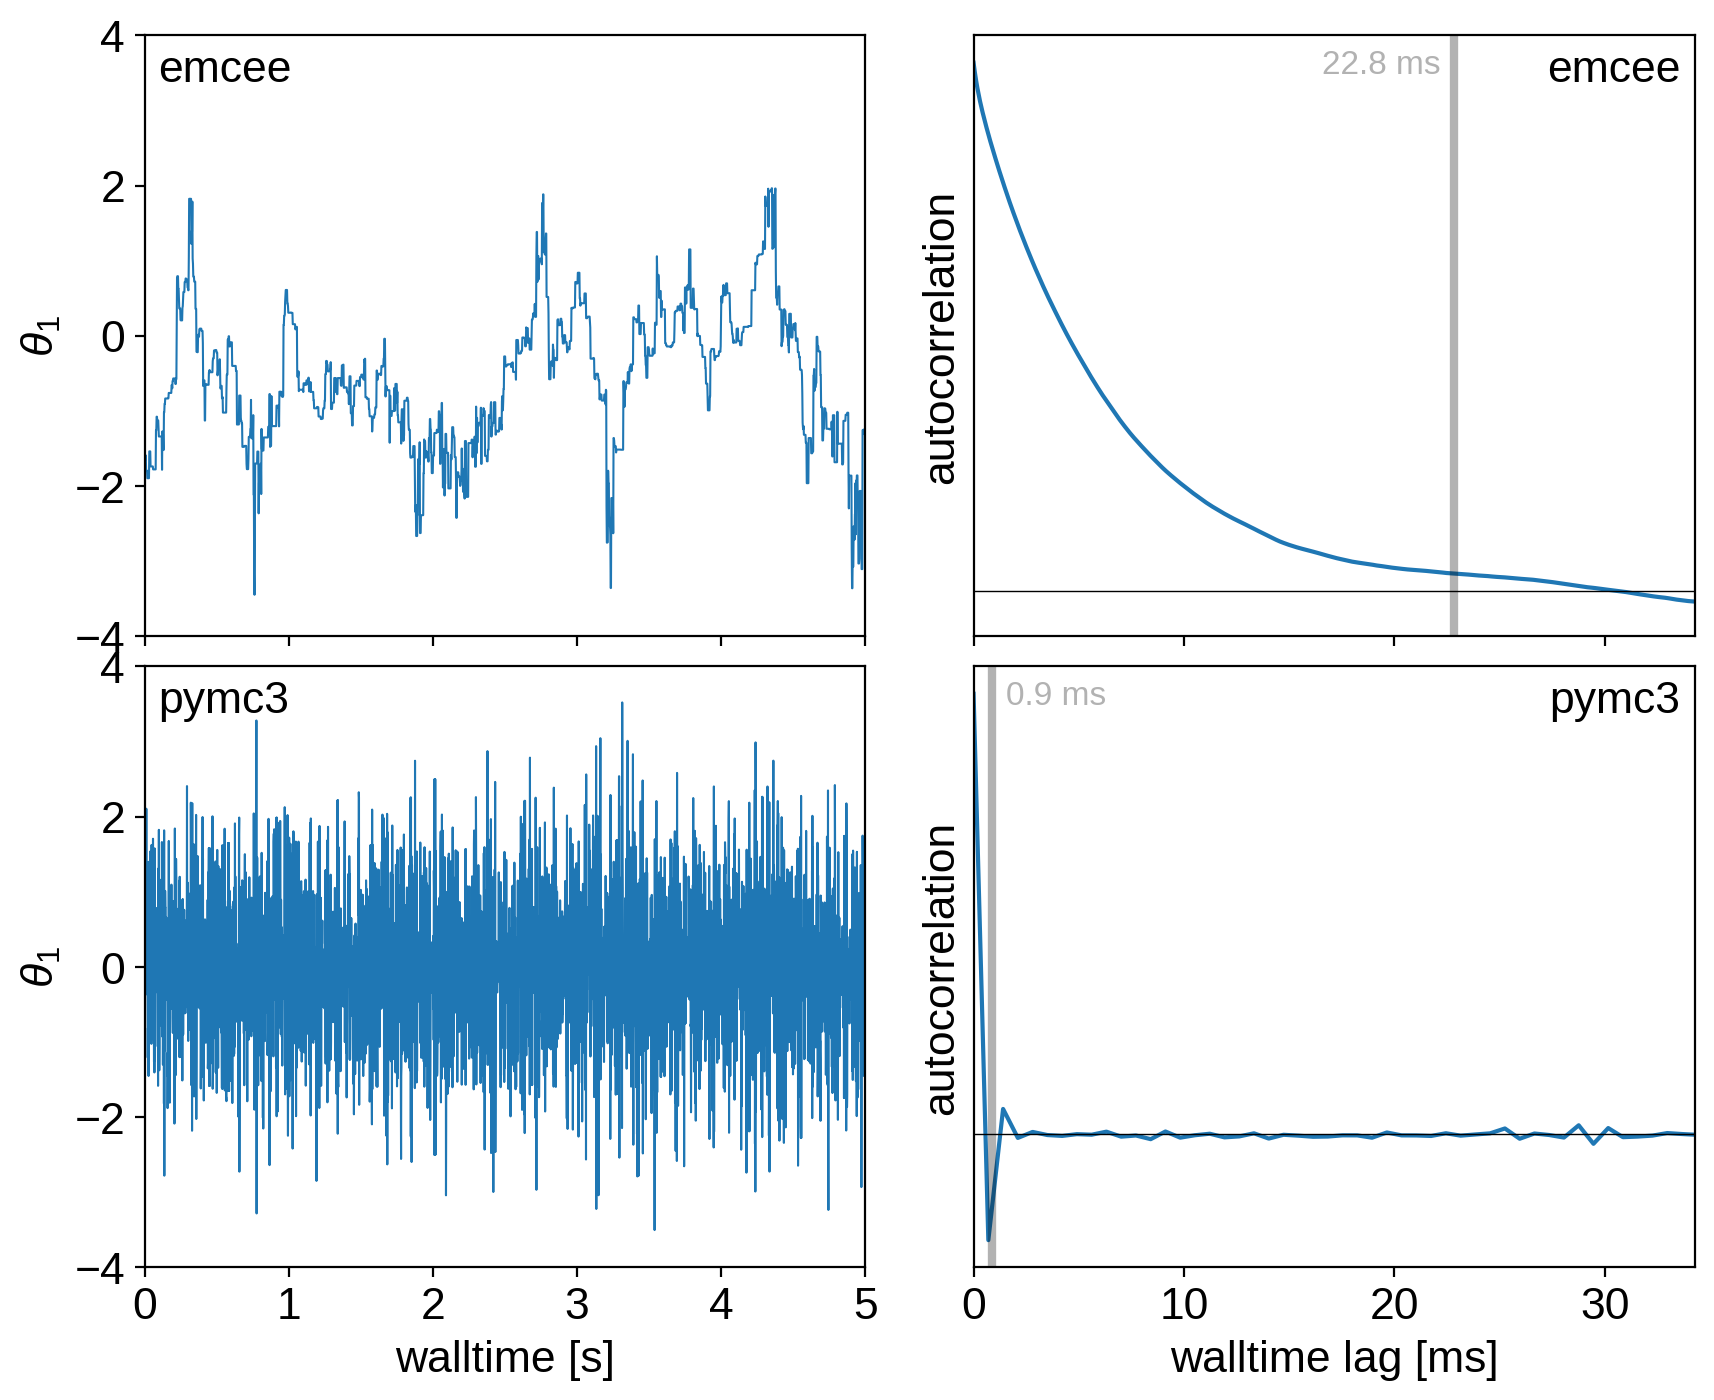

In [9]:
def get_function(x):
    n_t, n_w = x.shape
    f = np.zeros(n_t)
    for k in range(n_w):
        f += emcee.autocorr.function_1d(x[:, k])
    f /= n_w
    return f


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

ax = axes[0, 0]
t_emcee = np.linspace(0, time_emcee, samples_emcee.shape[0])
m = t_emcee < 5
ax.plot(t_emcee[m], samples_emcee[m, 5, 0], lw=0.75)
ax.annotate(
    "emcee",
    xy=(0, 1),
    xycoords="axes fraction",
    ha="left",
    va="top",
    fontsize=16,
    xytext=(5, -5),
    textcoords="offset points",
)
ax.set_ylabel(r"$\theta_1$")
ax.set_xlim(0, 5)
ax.set_ylim(-4, 4)
ax.set_xticklabels([])

ax = axes[1, 0]
t_pymc3 = np.linspace(0, time_pymc3, samples_pymc3.shape[0])
m = t_pymc3 < 5
ax.plot(t_pymc3[m], samples_pymc3[m, 0, 0], lw=0.75)
ax.annotate(
    "pymc3",
    xy=(0, 1),
    xycoords="axes fraction",
    ha="left",
    va="top",
    fontsize=16,
    xytext=(5, -5),
    textcoords="offset points",
)
ax.set_ylabel(r"$\theta_1$")
ax.set_xlabel("walltime [s]")
ax.set_xlim(0, 5)
ax.set_ylim(-4, 4)

ax = axes[0, 1]
f_emcee = get_function(samples_emcee[:, :, 0])
scale = 1e3 * time_emcee / np.prod(samples_emcee.shape[:2])
ax.plot(scale * np.arange(len(f_emcee)), f_emcee)
ax.axhline(0, color="k", lw=0.5)
ax.annotate(
    "emcee",
    xy=(1, 1),
    xycoords="axes fraction",
    ha="right",
    va="top",
    fontsize=16,
    xytext=(-5, -5),
    textcoords="offset points",
)
val = 2 * scale * tau_emcee[0]
max_x = 1.5 * val
ax.axvline(val, color="k", lw=3, alpha=0.3)
ax.annotate(
    "{0:.1f} ms".format(val),
    xy=(val / max_x, 1),
    xycoords="axes fraction",
    ha="right",
    va="top",
    fontsize=12,
    alpha=0.3,
    xytext=(-5, -5),
    textcoords="offset points",
)
ax.set_xlim(0, max_x)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_ylabel("autocorrelation")

ax = axes[1, 1]
f_pymc3 = get_function(samples_pymc3[:, :, 0])
scale = 1e3 * time_pymc3 / np.prod(samples_pymc3.shape[:2])
ax.plot(scale * np.arange(len(f_pymc3)), f_pymc3)
ax.axhline(0, color="k", lw=0.5)
ax.annotate(
    "pymc3",
    xy=(1, 1),
    xycoords="axes fraction",
    ha="right",
    va="top",
    fontsize=16,
    xytext=(-5, -5),
    textcoords="offset points",
)
val = 2 * scale * tau_pymc3[0]
ax.axvline(val, color="k", lw=3, alpha=0.3)
ax.annotate(
    "{0:.1f} ms".format(val),
    xy=(val / max_x, 1),
    xycoords="axes fraction",
    ha="left",
    va="top",
    fontsize=12,
    alpha=0.3,
    xytext=(5, -5),
    textcoords="offset points",
)
ax.set_xlim(0, max_x)
ax.set_yticks([])
ax.set_xlabel("walltime lag [ms]")
ax.set_ylabel("autocorrelation")

fig.subplots_adjust(hspace=0.05, wspace=0.15)
fig.savefig("gaussians.pdf", bbox_inches="tight");